In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
con =sqlite3.connect('zippedData/im.db')

In [3]:
# according to wikipedia
# Warcraft is highest-grossing video game adaptation of all time.
# gross $439 million worldwide

pd.read_sql("""
SELECT b.primary_title,b.original_title,b.genres,r.averagerating,r.numvotes
FROM movie_ratings AS r
LEFT JOIN movie_basics AS b
ON r.movie_id = b.movie_id
WHERE b.primary_title LIKE 'Warcraft'
ORDER BY r.averagerating DESC,numvotes DESC
LIMIT 5
""",con)

,primary_title,original_title,genres,averagerating,numvotes
0,Warcraft,Warcraft,"Action,Adventure,Fantasy",6.9,225557


In [4]:
# This is the list of video game adaptation film gross
# https://en.wikipedia.org/wiki/List_of_highest-grossing_films_based_on_video_games
# Detective Pikachu ranks the second

pd.read_sql("""
SELECT b.primary_title,b.genres,r.averagerating,r.numvotes
FROM movie_ratings AS r
LEFT JOIN movie_basics AS b
ON r.movie_id = b.movie_id
WHERE b.primary_title LIKE '%Pikachu%'
ORDER BY r.averagerating DESC,numvotes DESC
LIMIT 5
""",con)

,primary_title,genres,averagerating,numvotes
0,Pokémon Detective Pikachu,"Action,Adventure,Comedy",6.9,51444


In [5]:
# rank 3 is rampage

pd.read_sql("""
SELECT b.primary_title,b.genres,r.averagerating,r.numvotes,b.start_year
FROM movie_ratings AS r
LEFT JOIN movie_basics AS b
ON r.movie_id = b.movie_id
WHERE b.primary_title LIKE 'rampage'
ORDER BY r.averagerating DESC,numvotes DESC
LIMIT 5
""",con)

,primary_title,genres,averagerating,numvotes,start_year
0,Rampage,"Action,Adventure,Sci-Fi",6.1,115891,2018


In [6]:
df_IMDB_movie_info = pd.read_sql("""
SELECT b.primary_title,b.genres,r.averagerating,r.numvotes
FROM movie_ratings AS r
LEFT JOIN movie_basics AS b
ON r.movie_id = b.movie_id
ORDER BY r.averagerating DESC,numvotes DESC
""",con)

In [7]:
df_IMDB_movie_info

,primary_title,genres,averagerating,numvotes
0,Renegade,Documentary,10.0,20
1,Revolution Food,Documentary,10.0,8
2,Fly High: Story of the Disc Dog,Documentary,10.0,7
3,Calamity Kevin,"Adventure,Comedy",10.0,6
4,All Around Us,Documentary,10.0,6
...,...,...,...,...
73851,Tachiiri kinshi Haittara shinu? Norowareta 5 hen,Horror,1.0,6
73852,Pup Scouts,Animation,1.0,5
73853,Jak se mori revizori,Comedy,1.0,5
73854,Momok jangan cari pasal!,Comedy,1.0,5


In [11]:
df_IMDB_movie_info.sort_values(by=['numvotes'])


,primary_title,genres,averagerating,numvotes
73855,La Scelta Impossibile,Drama,1.0,5
2327,"Svetislav Pesic, More Than a Coach",Documentary,8.8,5
2328,Break a Nail,"Documentary,Sport",8.8,5
2329,Granada y al Paraíso,"Comedy,Drama",8.8,5
2330,The Marshall Plan,Documentary,8.8,5
...,...,...,...,...
7248,The Avengers,"Action,Adventure,Sci-Fi",8.1,1183655
4363,Django Unchained,"Drama,Western",8.4,1211405
2956,Interstellar,"Adventure,Drama,Sci-Fi",8.6,1299334
4362,The Dark Knight Rises,"Action,Thriller",8.4,1387769


In [14]:
#check how many of primary title matches original title
df_temp = pd.read_sql("""
SELECT primary_title,original_title, 
CASE
WHEN primary_title = original_title THEN 1
ELSE 0
END AS same_title
FROM movie_basics
""",con)
df_temp['same_title'].value_counts()

1    131640
0     14504
Name: same_title, dtype: int64

In [7]:
df_IMDB_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   primary_title  73856 non-null  object 
 1   genres         73052 non-null  object 
 2   averagerating  73856 non-null  float64
 3   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


In [44]:
df_IMDB_movie_info.describe()

#the 3 game adaption movies are in range of 50% 

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [13]:
df_IMDB_movie_info['genres'].value_counts().head(20)

Drama                    11612
Documentary              10313
Comedy                    5613
Horror                    2692
Comedy,Drama              2617
Thriller                  1555
Drama,Romance             1510
Comedy,Romance            1236
Comedy,Drama,Romance      1208
Horror,Thriller           1004
Drama,Thriller             990
Action                     979
Romance                    717
Biography,Documentary      694
Documentary,Drama          582
Comedy,Horror              579
Documentary,Music          579
Action,Crime,Drama         562
Crime,Drama,Thriller       504
Crime,Drama                494
Name: genres, dtype: int64

In [37]:
# check which one got so many votes
df_title_numvotes = pd.read_sql("""
SELECT b.primary_title,r.numvotes
FROM movie_ratings AS r
LEFT JOIN movie_basics AS b
ON r.movie_id = b.movie_id
ORDER BY numvotes DESC
""",con)

In [41]:
df_title_numvotes.describe()
# outliners

,numvotes
count,7.385600e+04
mean,3.523662e+03
std,3.029402e+04
min,5.000000e+00
25%,1.400000e+01
50%,4.900000e+01
75%,2.820000e+02
max,1.841066e+06


<AxesSubplot:>

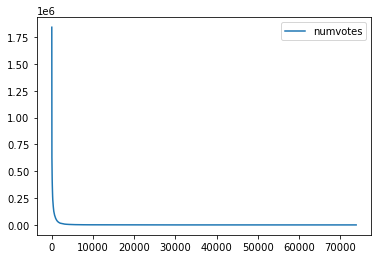

In [42]:
df_title_numvotes.plot()

In [4]:
df_video_games_grossing = pd.read_csv('zippedData/List_of_highest-grossing_films_based_on_video_games_wikipedia.csv')

In [14]:
df_video_games_grossing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Rank                        50 non-null     int64 
 1   Peak                        50 non-null     int64 
 2   Title                       50 non-null     object
 3   Based on video game(s)      50 non-null     object
 4   Original game publisher(s)  50 non-null     object
 5   Date                        50 non-null     object
 6   Worldwide gross             50 non-null     object
 7   Distributor                 50 non-null     object
 8   Format                      50 non-null     object
 9   Ref                         50 non-null     object
dtypes: int64(2), object(8)
memory usage: 4.0+ KB


In [8]:
df_video_game_budget = pd.read_csv('zippedData/Highest-grossing_video_game_films_by_year_wikipedia.csv')

In [16]:
# the video game adaptation films lists
df_profit_game_films = df_video_game_budget[df_video_game_budget['Budget']<=df_video_game_budget['Worldwide gross']]

#only 14/29 adaptation is profit

In [30]:
df_profit_game_films.drop()

,Year,Title,Worldwide gross,Budget,Based on video game(s),Original game publisher(s)
1,1994,Street Fighter,"$99,423,521","$35,000,000",Street Fighter,Capcom
3,1996,—,—,—,—,—
4,1997,Mortal Kombat: Annihilation,"$51,376,861","$30,000,000",Mortal Kombat,Midway Games
7,2000,Pokémon 3: The Movie,"$68,411,275","$3m-16,000,000",Pokémon,"Nintendo, The Pokémon Company"
8,2001,Lara Croft: Tomb Raider,"$274,703,340","$115,000,000",Tomb Raider,Eidos Interactive
13,2006,Silent Hill,"$97,607,453","$50,000,000",Silent Hill,Konami
15,2008,Max Payne,"$85,416,905","$35,000,000",Max Payne,Rockstar Games
17,2010,Prince of Persia: The Sands of Time,"$336,365,676","$150m–200,000,000",Prince of Persia: The Sands of Time,Ubisoft
22,2015,Hitman: Agent 47,"$82,347,656","$35,000,000",Hitman,Square Enix
23,2016,Warcraft,"$439,048,914","$160,000,000",Warcraft,Blizzard Entertainment


In [35]:
df_bom = pd.read_csv('zippedData/bom.movie_gross.csv')

In [36]:
df_bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [45]:
df_bom[df_bom.title.str.contains('Warcraft')]

,title,studio,domestic_gross,foreign_gross,year
2339,Warcraft,Uni.,47400000.0,386300000,2016


In [47]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [62]:
df_bom['foreign_gross'] = df_bom['foreign_gross'].str.replace(',', '').astype(int)

ValueError: cannot convert float NaN to integer

In [ ]:
df_bom['foreign_gross'].apply(lambda x: x.str.replace(',',''))

In [30]:
# IMDB select columns from movie_basics
# primary_name,original_title,genres,averagerating,numvotes
# order by primary_title

df_IMDB = pd.read_sql("""
SELECT b.primary_title,b.original_title,b.genres AS IMDB_genres,r.averagerating AS IMDB_ratings,r.numvotes AS IMDB_nvotes
FROM movie_ratings AS r
LEFT JOIN movie_basics AS b
ON r.movie_id = b.movie_id
ORDER BY b.primary_title
""",con)
df_IMDB.head()

,primary_title,original_title,IMDB_genres,IMDB_ratings,IMDB_nvotes
0,!Women Art Revolution,Women Art Revolution,Documentary,6.9,196
1,#1 Serial Killer,#1 Serial Killer,Horror,5.6,40
2,#5,#5,"Biography,Comedy,Fantasy",6.8,6
3,#66,#66,Action,5.3,18
4,#ALLMYMOVIES,#ALLMYMOVIES,Documentary,8.3,21


In [32]:
df_IMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   primary_title   73856 non-null  object 
 1   original_title  73856 non-null  object 
 2   IMDB_genres     73052 non-null  object 
 3   IMDB_ratings    73856 non-null  float64
 4   IMDB_nvotes     73856 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.8+ MB


In [33]:
# get TM movies CSV
# start to clean it
df_tm_movies = pd.read_csv('zippedData/tmdb.movies.csv')
df_tm_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [ ]:
df_tm_movies_clean

In [ ]:
df_tm_movies['']